In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

In [12]:
def data_probability(n, p, k):
    q = 1 - p
    comb = factorial(n) / (factorial(k) * factorial(n - k))
    prob = comb * (p ** k) * (q ** (n - k))
    return prob

In [13]:
p = 0.5
n = 100
k = np.arange(0, n + 1)
print(k)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100]


[7.88860905e-31 7.88860905e-29 3.90486148e-27 1.27558808e-25
 3.09330110e-24 5.93913812e-23 9.40363535e-22 1.26277389e-20
 1.46797465e-19 1.50059631e-18 1.36554264e-17 1.11726216e-16
 8.28636101e-16 5.60922899e-15 3.48573516e-14 1.99848816e-13
 1.06169683e-12 5.24603142e-12 2.41900338e-11 1.04399093e-10
 4.22816327e-10 1.61072886e-09 5.78398092e-09 1.96152396e-08
 6.29322272e-08 1.91313971e-07 5.51867223e-07 1.51252498e-06
 3.94336870e-06 9.79043264e-06 2.31706906e-05 5.23209142e-05
 1.12816971e-04 2.32471335e-04 4.58105277e-04 8.63855666e-04
 1.55973940e-03 2.69792760e-03 4.47287998e-03 7.11073227e-03
 1.08438667e-02 1.58690732e-02 2.22922695e-02 3.00686426e-02
 3.89525598e-02 4.84742966e-02 5.79583981e-02 6.65905000e-02
 7.35270104e-02 7.80286641e-02 7.95892374e-02 7.80286641e-02
 7.35270104e-02 6.65905000e-02 5.79583981e-02 4.84742966e-02
 3.89525598e-02 3.00686426e-02 2.22922695e-02 1.58690732e-02
 1.08438667e-02 7.11073227e-03 4.47287998e-03 2.69792760e-03
 1.55973940e-03 8.638556

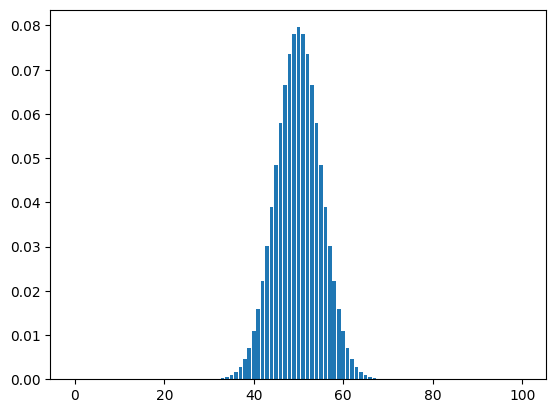

In [17]:
prob = data_probability(n, p, k)
print(prob)
plt.bar(k, prob)
plt.show()

In [19]:
data_probability(100, 0.5, 80)

np.float64(4.228163267601508e-10)

In [21]:
phi = 0.5
theta = (1 + phi) / 2
data_probability(100, theta, 80)

np.float64(0.049300640337676345)

In [23]:
factorial(100) / (factorial(80) * factorial(20)) * (0.5 ** 80) * (0.5 ** 20)

np.float64(4.228163267601508e-10)

In [36]:
phi_vector = np.linspace(0, 1, 1001)
print(phi_vector)

[0.    0.001 0.002 ... 0.998 0.999 1.   ]


In [38]:
theta = (1 + phi_vector) / 2
print(theta)

[0.5    0.5005 0.501  ... 0.999  0.9995 1.    ]


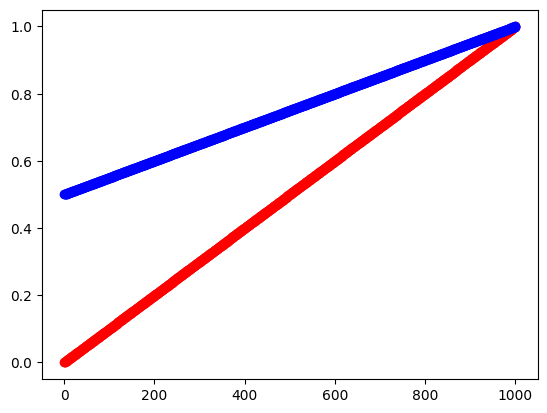

In [39]:
plt.plot(phi_vector, 'r-o')
plt.plot(theta, 'b-o')
plt.show()

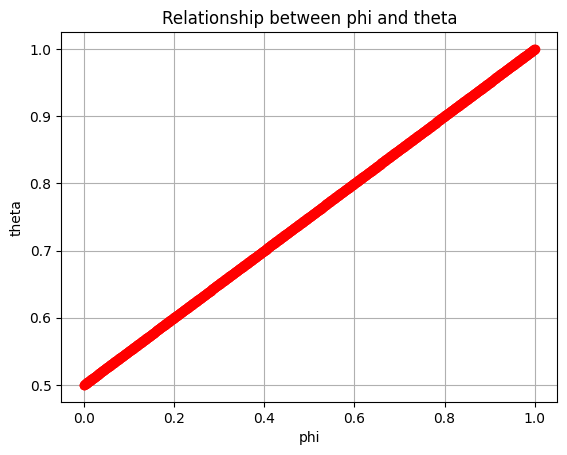

In [40]:
plt.plot(phi_vector, theta, 'r-o')
plt.xlabel('phi')
plt.ylabel('theta')
plt.title('Relationship between phi and theta')
plt.grid()
plt.show()

[4.22816327e-10 4.48939390e-10 4.76628818e-10 ... 4.94755207e-40
 4.91106043e-46 0.00000000e+00]


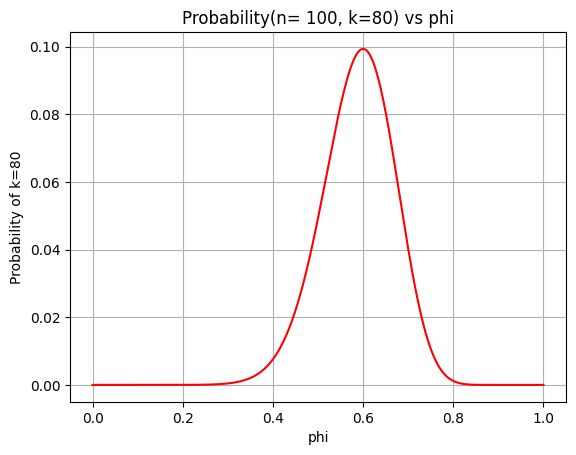

In [44]:
prob = data_probability(n=100, p=theta, k=80)
print(prob)
plt.plot(phi_vector, prob, 'r-')
plt.xlabel('phi')
plt.ylabel('Probability of k=80')
plt.title('Probability(n= 100, k=80) vs phi')
plt.grid()
plt.show()

probability of phi 

$$
    Pr[80 | \phi] = Binomial(80 | N = 100, phi)
$$

$$
    p(\phi | 80) = \prac{Pr[80 | phi] * p(phi) / Z
$$

In [52]:
phi_vector

array([0.   , 0.001, 0.002, ..., 0.998, 0.999, 1.   ], shape=(1001,))

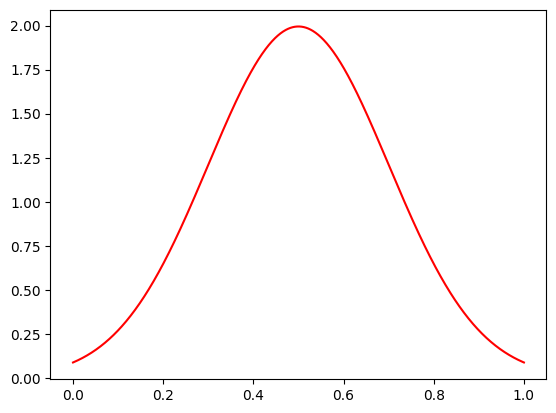

In [53]:
from scipy.stats import norm
prior = norm.pdf(phi_vector, loc=0.5, scale=0.2)
plt.plot(phi_vector, prior, 'r-')

[0.    0.001 0.002 ... 0.998 0.999 1.   ]


Text(0, 0.5, 'Prior Probability')

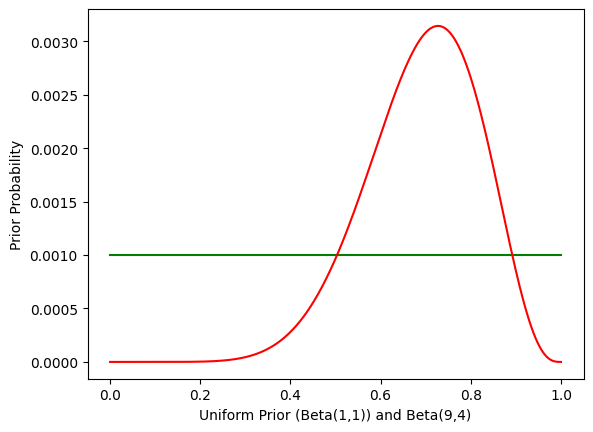

In [55]:
from scipy.stats import beta
# 1. uniform prior
phi_vector = np.linspace(0, 1, 1001)
print(phi_vector)
prior = beta.pdf(phi_vector, 1, 1)
prior = prior / np.sum(prior)

prior2 = beta.pdf(phi_vector, 9, 4)
prior2 = prior2 / np.sum(prior2)

plt.plot(phi_vector, prior, 'g-')
plt.plot(phi_vector, prior2, 'r-')
plt.xlabel('Uniform Prior (Beta(1,1)) and Beta(9,4)')
plt.ylabel('Prior Probability')


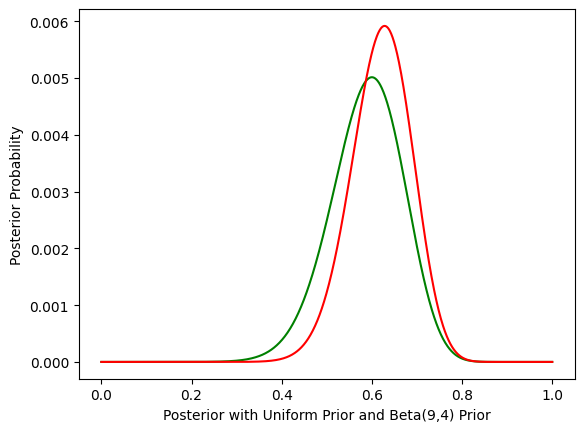

In [58]:
posterior_unnormalized = prob * prior
posterior = posterior_unnormalized / np.sum(posterior_unnormalized)

posterior_unnormalized2 = prob * prior2
posterior2 = posterior_unnormalized2 / np.sum(posterior_unnormalized2)

plt.plot(phi_vector, posterior, 'g-')
plt.plot(phi_vector, posterior2, 'r-')
plt.xlabel('Posterior with Uniform Prior and Beta(9,4) Prior')
plt.ylabel('Posterior Probability')
plt.show()

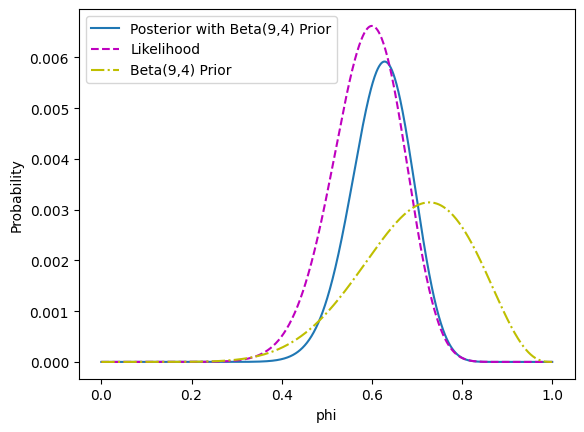

In [ ]:
plt.plot(phi_vector, posterior2, label='Posterior with Beta(9,4) Prior')
plt.plot(phi_vector, prob / 15, 'm--', label='Likelihood')
plt.plot(phi_vector, prior2, 'y-.', label='Beta(9,4) Prior')
plt.xlabel('phi')
plt.ylabel('Probability')
plt.legend()
plt.show()
# prior와 likelihood의 사이에 posterior가 위치함